#📌 Extracão

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)


In [16]:
#juntado todos DF em apenas um DF

dados_df = pd.concat([
    dados.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(dados['customer']),
    pd.json_normalize(dados['phone']),
    pd.json_normalize(dados['internet']),
    pd.json_normalize(dados['account'])
], axis=1)

dados_df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [28]:
#Renomeando Cabeçalhos para melhor entendimento

dados_df = dados_df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Conjuge',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_Permanencia',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
})

In [29]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Possui_Conjuge        7267 non-null   bool   
 5   Possui_Dependentes    7267 non-null   bool   
 6   Meses_Permanencia     7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   bool   
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  OnlineSecurity        7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [30]:
#Não há ID de Clientes repetidos, com isso nao temos problemas em dados duplicados.
dados_df.ID_Cliente.duplicated()

,ID_Cliente
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [33]:
#transformando as Colunas que estavam em Object para numeros

colunas_transformadas = ['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']

dados_df[colunas_transformadas] = dados_df[colunas_transformadas].apply(pd.to_numeric, errors='coerce')
dados_df.dtypes

,0
ID_Cliente,object
Cancelou,object
Genero,object
Idoso,int64
Possui_Conjuge,bool
Possui_Dependentes,bool
Meses_Permanencia,int64
Servico_Telefone,bool
Multiplas_Linhas,object
Tipo_Internet,object


In [34]:
#verificando
dados_df.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Genero,0
Idoso,0
Possui_Conjuge,0
Possui_Dependentes,0
Meses_Permanencia,0
Servico_Telefone,0
Multiplas_Linhas,0
Tipo_Internet,0


In [35]:
dados_df[dados_df['Cobranca_Total'].isnull()]

dados_df['Cobranca_Total'] = dados_df['Cobranca_Total'].fillna(0)

dados_df['Cancelou'] = dados_df['Cancelou']



In [36]:
#aqui trabalamos para entendermos se temos falsos numeros, com isso acharemos dados vazios no DataFrame

# Definindo a lista de valores a serem considerados "falso nulo"
false_null_values = ['', ' ', 'NA', 'NaN', 'null']

# Iterando pelas colunas do tipo 'object' que não foram mapeadas para booleano
object_cols_to_check = dados_df.select_dtypes(include='object').columns
boolean_mapped_cols = [col for col, dtype in dados_df.dtypes.items() if dtype == 'bool' and col in object_cols_to_check]

cols_to_check = [col for col in object_cols_to_check if col not in boolean_mapped_cols]

print("Verificando 'falso nulo' nas seguintes colunas:")
print(cols_to_check)
print("-" * 30)

for col in cols_to_check:
    false_nulls_in_col = dados_df[dados_df[col].astype(str).str.strip().isin(false_null_values)]

    if not false_nulls_in_col.empty:
        print(f"Linhas com 'falso nulo' na coluna '{col}':")
        display(false_nulls_in_col)
        print(f"\nContagem de 'falso nulo' na coluna '{col}': {false_nulls_in_col.shape[0]}")
        print("-" * 30)
    else:
        print(f"Nenhum 'falso nulo' encontrado na coluna '{col}'.")
        print("-" * 30)

Verificando 'falso nulo' nas seguintes colunas:
['ID_Cliente', 'Cancelou', 'Genero', 'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Metodo_Pagamento']
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'ID_Cliente'.
------------------------------
Linhas com 'falso nulo' na coluna 'Cancelou':


,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
30,0047-ZHDTW,,Female,0,False,False,11,True,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,True,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,False,False,71,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,True,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,False,False,29,True,No,DSL,...,Yes,No,Yes,No,No,One year,True,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,False,False,5,True,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,False,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,True,False,65,True,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,True,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,False,False,14,True,Yes,DSL,...,Yes,No,No,No,No,One year,True,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,True,False,49,False,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,False,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,False,False,9,True,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,True,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,True,True,67,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,True,Bank transfer (automatic),19.25,1372.90



Contagem de 'falso nulo' na coluna 'Cancelou': 224
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Genero'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Multiplas_Linhas'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tipo_Internet'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'OnlineSecurity'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Backup_Online'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Protecao_Dispositivo'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Suporte_Tecnico'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Streaming_TV'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Streaming_Filmes'.
------------------------------
Nenhum 'falso nulo' encontrado na coluna 'Tipo_Contrato'.
------------------------------
Nenhum 'falso nulo'

#🔧 Transformação

In [40]:
dados_df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [41]:
# criamos duas colunas, para mostrar os valores diarios com as cobranas mensais e as cobranças totais.
dados_df['Cobranca_diaria_(valorMensal)'] = round(dados_df['Cobranca_Mensal'] / 30, 2)
dados_df['Cobranca_diaria_(valorTotal)'] = round(dados_df['Cobranca_Total'] / dados_df['Meses_Permanencia'] / 30, 2)
dados_df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
0,0002-ORFBO,No,Female,0,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19,2.20
1,0003-MKNFE,No,Male,0,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00,2.01
2,0004-TLHLJ,Yes,Male,0,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46,2.34
3,0011-IGKFF,Yes,Male,1,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27,3.17
4,0013-EXCHZ,Yes,Female,1,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80,2.97


In [42]:
dados_df.query("Meses_Permanencia == 12")

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
39,0064-SUDOG,No,Female,0,True,True,12,True,No,No,...,No internet service,No internet service,No internet service,Two year,False,Bank transfer (automatic),20.30,224.50,0.68,0.62
86,0135-NMXAP,Yes,Female,0,False,False,12,True,Yes,Fiber optic,...,No,Yes,No,Month-to-month,True,Bank transfer (automatic),89.75,1052.40,2.99,2.92
124,0208-BPQEJ,No,Female,0,True,True,12,True,No,No,...,No internet service,No internet service,No internet service,Month-to-month,False,Bank transfer (automatic),19.40,198.10,0.65,0.55
181,0282-NVSJS,No,Female,1,True,True,12,False,No phone service,DSL,...,Yes,No,No,Month-to-month,True,Mailed check,29.30,355.90,0.98,0.99
381,0547-HURJB,No,Male,0,False,True,12,True,No,No,...,No internet service,No internet service,No internet service,Month-to-month,False,Credit card (automatic),21.05,235.80,0.70,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,9391-EOYLI,Yes,Male,1,True,False,12,True,No,Fiber optic,...,No,No,Yes,Month-to-month,True,Electronic check,80.45,950.20,2.68,2.64
6854,9456-ETVCM,,Male,0,False,False,12,True,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,False,Electronic check,94.55,1173.55,3.15,3.26
7131,9817-APLHW,No,Male,0,False,False,12,True,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,False,Electronic check,25.00,316.20,0.83,0.88
7152,9837-FWLCH,No,Male,0,True,True,12,True,No,No,...,No internet service,No internet service,No internet service,Month-to-month,True,Electronic check,19.20,239.00,0.64,0.66


#📊 Carga e análise

In [43]:
dados_df.describe()

,Idoso,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157292,2.158461
std,0.369074,24.571773,30.129572,2268.648587,1.004407,1.007454
min,0.000000,0.000000,18.250000,0.000000,0.610000,0.460000
25%,0.000000,9.000000,35.425000,396.200000,1.180000,1.190000
50%,0.000000,29.000000,70.300000,1389.200000,2.340000,2.340000
75%,0.000000,55.000000,89.875000,3778.525000,2.995000,3.010000
max,1.000000,72.000000,118.750000,8684.800000,3.960000,4.050000


***PRECISAMOS ENTENDER ESSA COLUNA DE IDOSO, OS IDOSOS PERMANECEM MAIS TEMPO? **

In [44]:
dados_Idosos = dados_df.query('Idoso == 1')
dados_Nao_Idosos = dados_df.query('Idoso == 0')

In [45]:
print( '//  Dados de pessoas Idosas \\')
dados_Idosos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']].mean()





//  Dados de pessoas Idosas \


,0
Meses_Permanencia,33.360406
Cobranca_Mensal,79.785195
Cobranca_Total,2812.864848


In [46]:
print('// Dados de Não Idosos \\ ')

dados_Nao_Idosos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']].mean()

// Dados de Não Idosos \ 


,0
Meses_Permanencia,32.149548
Cobranca_Mensal,61.793730
Cobranca_Total,2173.126639


In [48]:
#Numero de Idosos

numero_idosos = dados_Idosos['Idoso'].sum()


#NUmero e Não Idosos
numero_nao_idosos = quantidade_Nao_idosos = dados_df.query('Idoso == 0').shape[0]


total = numero_idosos + numero_nao_idosos

#Idosos Permanentes
idosos_permanentes = dados_df.query('Idoso == 1 & Cancelou == "No"').shape[0]



print(f'Numero de Idosos nos dados coletados é de : {numero_idosos}, e o numero de Não Idosos é de: {numero_nao_idosos}')
print('\n')
print('Com isso Conseguimos fazer algumas analises')
print('\n')
print(f'A proporção de Idosos no df é de : {numero_idosos / total:.2%}')
print('\n')
print(f'Numero de Idosos que ainda permanecem é de {idosos_permanentes}, e é de proporção de {idosos_permanentes / total:.2%}')






Numero de Idosos nos dados coletados é de : 1182, e o numero de Não Idosos é de: 6085


Com isso Conseguimos fazer algumas analises


A proporção de Idosos no df é de : 16.27%


Numero de Idosos que ainda permanecem é de 666, e é de proporção de 9.16%


In [49]:
Clientes_total = dados_df.query('Cancelou == "No"').shape[0]

Clientes_nao_Idosos = Clientes_total - idosos_permanentes

Clientes_Cancelados = dados_df.query('Cancelou == "Yes"').shape[0]

print(f'Clientes totais: {Clientes_total} \n Clientes não idosos: {Clientes_nao_Idosos}, \n Total de Clientes Cancelados: {Clientes_Cancelados}. \n Proporção de Cancelamento {Clientes_Cancelados / Clientes_total:.2%}')


Clientes totais: 5174 
 Clientes não idosos: 4508, 
 Total de Clientes Cancelados: 1869. 
 Proporção de Cancelamento 36.12%


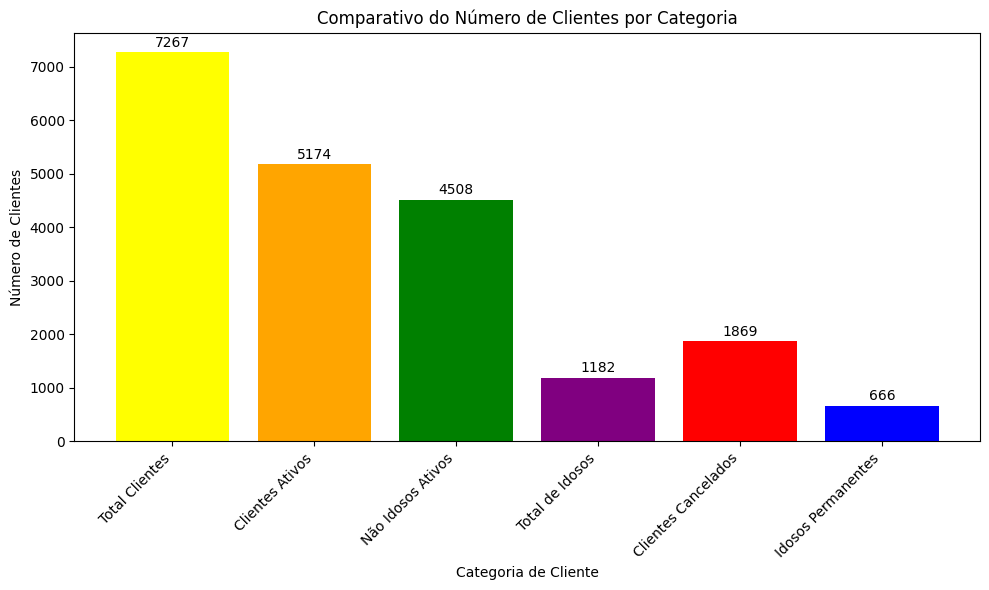

In [50]:
# Definindo os rótulos para as barras
labels = ['Total Clientes', 'Clientes Ativos' ,'Não Idosos Ativos', 'Total de Idosos' , 'Clientes Cancelados', 'Idosos Permanentes',  ]

# Definindo os valores correspondentes às barras (usando as variáveis calculadas anteriormente)
# Certifique-se de que estas variáveis foram definidas nas células anteriores
values = [total, Clientes_total, Clientes_nao_Idosos, numero_idosos, Clientes_Cancelados, idosos_permanentes ]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.bar(labels, values, color=['Yellow', 'orange', 'green', 'purple', 'red', 'blue'])

# Adicionando títulos e rótulos aos eixos
plt.title('Comparativo do Número de Clientes por Categoria')
plt.xlabel('Categoria de Cliente')
plt.ylabel('Número de Clientes')

# Rotacionar rótulos do eixo x se necessário para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando os valores acima das barras para melhor leitura
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

# Ajustando o layout para evitar cortes nos rótulos
plt.tight_layout()

# Mostrando o gráfico
plt.show()

In [51]:
dados_df.head()



,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
0,0002-ORFBO,No,Female,0,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19,2.20
1,0003-MKNFE,No,Male,0,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00,2.01
2,0004-TLHLJ,Yes,Male,0,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46,2.34
3,0011-IGKFF,Yes,Male,1,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27,3.17
4,0013-EXCHZ,Yes,Female,1,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80,2.97


In [52]:
Clientes_Mulheres = dados_df.query('Genero == "Female"')
Clientes_Homens = dados_df.query('Genero == "Male"')

Clientes_mulheres_total = dados_df.query('Genero == "Female"').shape[0]
clientes_mulheres_ativas = dados_df.query('Genero == "Female" & Cancelou == "No"').shape[0]
clientes_mulheres_canceladas = dados_df.query('Genero == "Female" & Cancelou == "Yes"').shape[0]

Clientes_Homens_total = dados_df.query('Genero == "Male"').shape[0]
clientes_homens_ativos = dados_df.query('Genero == "Male" & Cancelou == "No"').shape[0]
clientes_homens_cancelados = dados_df.query('Genero == "Male" & Cancelou == "Yes"').shape[0]



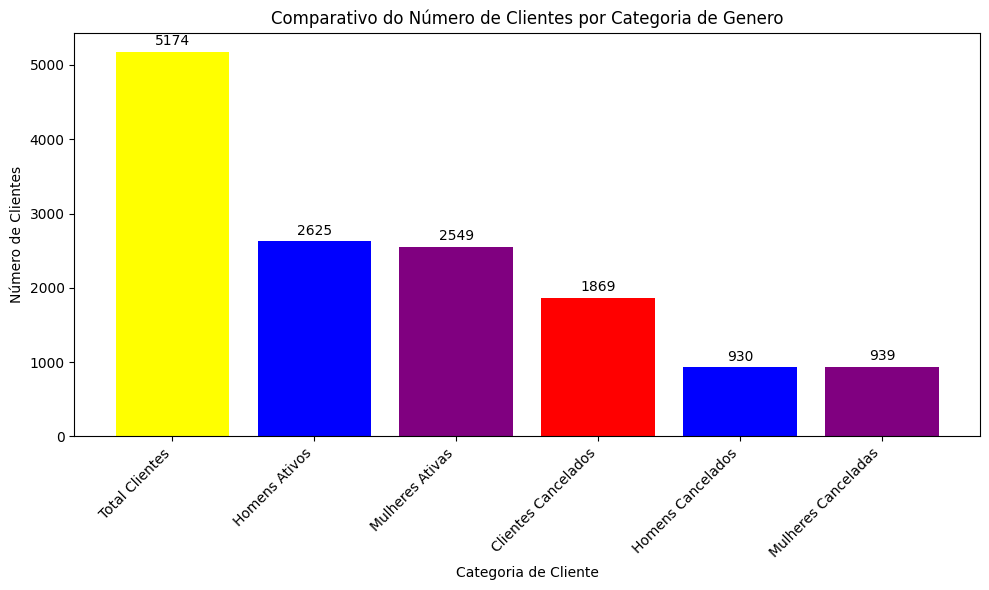

In [53]:

labels = ['Total Clientes', 'Homens Ativos', 'Mulheres Ativas', 'Clientes Cancelados', 'Homens Cancelados', "Mulheres Canceladas"  ]

# Definindo os valores correspondentes às barras (usando as variáveis calculadas anteriormente)
# Certifique-se de que estas variáveis foram definidas nas células anteriores
values = [ Clientes_total, clientes_homens_ativos, clientes_mulheres_ativas, Clientes_Cancelados, clientes_homens_cancelados, clientes_mulheres_canceladas ]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.bar(labels, values, color=['Yellow', 'Blue',  'purple', 'red', 'Blue', 'purple'])

# Adicionando títulos e rótulos aos eixos
plt.title('Comparativo do Número de Clientes por Categoria de Genero')
plt.xlabel('Categoria de Cliente')
plt.ylabel('Número de Clientes')

# Rotacionar rótulos do eixo x se necessário para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando os valores acima das barras para melhor leitura
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

# Ajustando o layout para evitar cortes nos rótulos
plt.tight_layout()

# Mostrando o gráfico
plt.show()

In [59]:

dados_df['Servico_Telefone'] = dados_df['Servico_Telefone'].replace({True:'Yes', False: 'No'})
dados_df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
0,0002-ORFBO,No,Female,0,True,True,9,Yes,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19,2.20
1,0003-MKNFE,No,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00,2.01
2,0004-TLHLJ,Yes,Male,0,False,False,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46,2.34
3,0011-IGKFF,Yes,Male,1,True,False,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27,3.17
4,0013-EXCHZ,Yes,Female,1,True,False,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80,2.97


In [86]:
Dados_clientes_Ativos = dados_df.query('Cancelou == "No"')
dados_clientes_não_ativos = dados_df.query('Cancelou == "Yes"')

In [97]:
Clientes_produtos_completos = Dados_clientes_Ativos.query('Servico_Telefone == "Yes" & Multiplas_Linhas == "Yes" & Suporte_Tecnico == "Yes" & Streaming_TV == "Yes" & Streaming_Filmes == "Yes"')
Clientes_nao_completos = Dados_clientes_Ativos.query('not (Servico_Telefone == "Yes" and Multiplas_Linhas == "Yes" and Suporte_Tecnico == "Yes" and Streaming_TV == "Yes" and Streaming_Filmes == "Yes")')


Clientes_produtos_completos_cancelado = dados_clientes_não_ativos.query('Servico_Telefone == "Yes" & Multiplas_Linhas == "Yes" & Suporte_Tecnico == "Yes" & Streaming_TV == "Yes" & Streaming_Filmes == "Yes"')
Clientes_nao_completos_cancelado = dados_clientes_não_ativos.query('not (Servico_Telefone == "Yes" and Multiplas_Linhas == "Yes" and Suporte_Tecnico == "Yes" and Streaming_TV == "Yes" and Streaming_Filmes == "Yes")')

print(f'O numero de clientes que tem todos os pacotes de serviço é de : {Clientes_produtos_completos.shape[0]} ou seja, {Clientes_produtos_completos.shape[0] / Dados_clientes_Ativos.shape[0]:.2%}. \n O numero de Clientes que nao possui o pacote completo: {Clientes_nao_completos.shape[0]}, ou seja, {Clientes_nao_completos.shape[0] / Dados_clientes_Ativos.shape[0]:.2%}')


print(f'O numero de clientes que tem todos os pacotes de serviço que cancelaram seu plano é de : {Clientes_produtos_completos_cancelado.shape[0]}, ou seja, {Clientes_produtos_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]:.2%} \n O numero de Clientes que nao possui o pacote completo e cancelaram: {Clientes_nao_completos_cancelado.shape[0]}, ou seja, {Clientes_nao_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]:.2%}')

O numero de clientes que tem todos os pacotes de serviço é de : 495 ou seja, 9.57%. 
 O numero de Clientes que nao possui o pacote completo: 4679, ou seja, 90.43%
O numero de clientes que tem todos os pacotes de serviço que cancelaram seu plano é de : 93, ou seja, 4.98% 
 O numero de Clientes que nao possui o pacote completo e cancelaram: 1776, ou seja, 95.02%


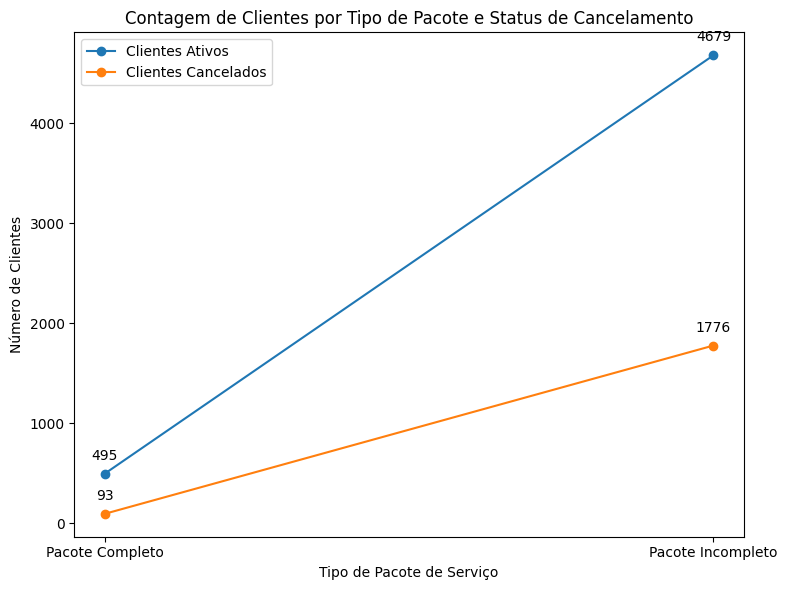

In [98]:
# Dados para o gráfico
categorias = ['Pacote Completo', 'Pacote Incompleto']
ativos_counts = [Clientes_produtos_completos.shape[0], Clientes_nao_completos.shape[0]]
cancelados_counts = [Clientes_produtos_completos_cancelado.shape[0], Clientes_nao_completos_cancelado.shape[0]]

# Criando o gráfico de linha
plt.figure(figsize=(8, 6))

plt.plot(categorias, ativos_counts, marker='o', linestyle='-', label='Clientes Ativos')
plt.plot(categorias, cancelados_counts, marker='o', linestyle='-', label='Clientes Cancelados')

# Adicionando títulos e rótulos aos eixos
plt.title('Contagem de Clientes por Tipo de Pacote e Status de Cancelamento')
plt.xlabel('Tipo de Pacote de Serviço')
plt.ylabel('Número de Clientes')
plt.legend() # Adiciona a legenda para identificar as linhas

# Adicionando os valores acima dos pontos
for i, txt in enumerate(ativos_counts):
    plt.annotate(txt, (categorias[i], ativos_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

for i, txt in enumerate(cancelados_counts):
    plt.annotate(txt, (categorias[i], cancelados_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')


# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

In [100]:
# Calculando as taxas de cancelamento para cada grupo
taxa_cancelamento_idosos = Clientes_produtos_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]
taxa_cancelamento_nao_idosos = Clientes_nao_completos_cancelado.shape[0] / dados_clientes_não_ativos.shape[0]

taxa_cancelamento_homens = clientes_homens_cancelados / Clientes_Homens_total
taxa_cancelamento_mulheres = clientes_mulheres_canceladas / Clientes_mulheres_total

# Assuming 'Dados_clientes_Ativos' and 'dados_clientes_não_ativos' contain the total counts for complete/incomplete package holders
total_completo = Clientes_produtos_completos.shape[0] + Clientes_produtos_completos_cancelado.shape[0]
total_incompleto = Clientes_nao_completos.shape[0] + Clientes_nao_completos_cancelado.shape[0]

taxa_cancelamento_pacote_completo = Clientes_produtos_completos_cancelado.shape[0] / total_completo if total_completo > 0 else 0
taxa_cancelamento_pacote_incompleto = Clientes_nao_completos_cancelado.shape[0] / total_incompleto if total_incompleto > 0 else 0


print(f"Taxa de Cancelamento - Idosos (Pacote Completo): {taxa_cancelamento_idosos:.2%}")
print(f"Taxa de Cancelamento - Não Idosos (Pacote Incompleto): {taxa_cancelamento_nao_idosos:.2%}")
print(f"Taxa de Cancelamento - Homens: {taxa_cancelamento_homens:.2%}")
print(f"Taxa de Cancelamento - Mulheres: {taxa_cancelamento_mulheres:.2%}")
print(f"Taxa de Cancelamento - Pacote Completo: {taxa_cancelamento_pacote_completo:.2%}")
print(f"Taxa de Cancelamento - Pacote Incompleto: {taxa_cancelamento_pacote_incompleto:.2%}")

# Comparando as taxas para encontrar o grupo com maior vazão (churn)
taxas = {
    'Idosos (Pacote Completo)': taxa_cancelamento_idosos,
    'Não Idosos (Pacote Incompleto)': taxa_cancelamento_nao_idosos,
    'Homens': taxa_cancelamento_homens,
    'Mulheres': taxa_cancelamento_mulheres,
    'Pacote Completo': taxa_cancelamento_pacote_completo,
    'Pacote Incompleto': taxa_cancelamento_pacote_incompleto
}

grupo_maior_vazao = max(taxas, key=taxas.get)
maior_taxa = taxas[grupo_maior_vazao]

print(f"\nO grupo com a maior taxa de cancelamento ('Vazão') é: {grupo_maior_vazao} com {maior_taxa:.2%}")

Taxa de Cancelamento - Idosos (Pacote Completo): 4.98%
Taxa de Cancelamento - Não Idosos (Pacote Incompleto): 95.02%
Taxa de Cancelamento - Homens: 25.31%
Taxa de Cancelamento - Mulheres: 26.14%
Taxa de Cancelamento - Pacote Completo: 15.82%
Taxa de Cancelamento - Pacote Incompleto: 27.51%

O grupo com a maior taxa de cancelamento ('Vazão') é: Não Idosos (Pacote Incompleto) com 95.02%


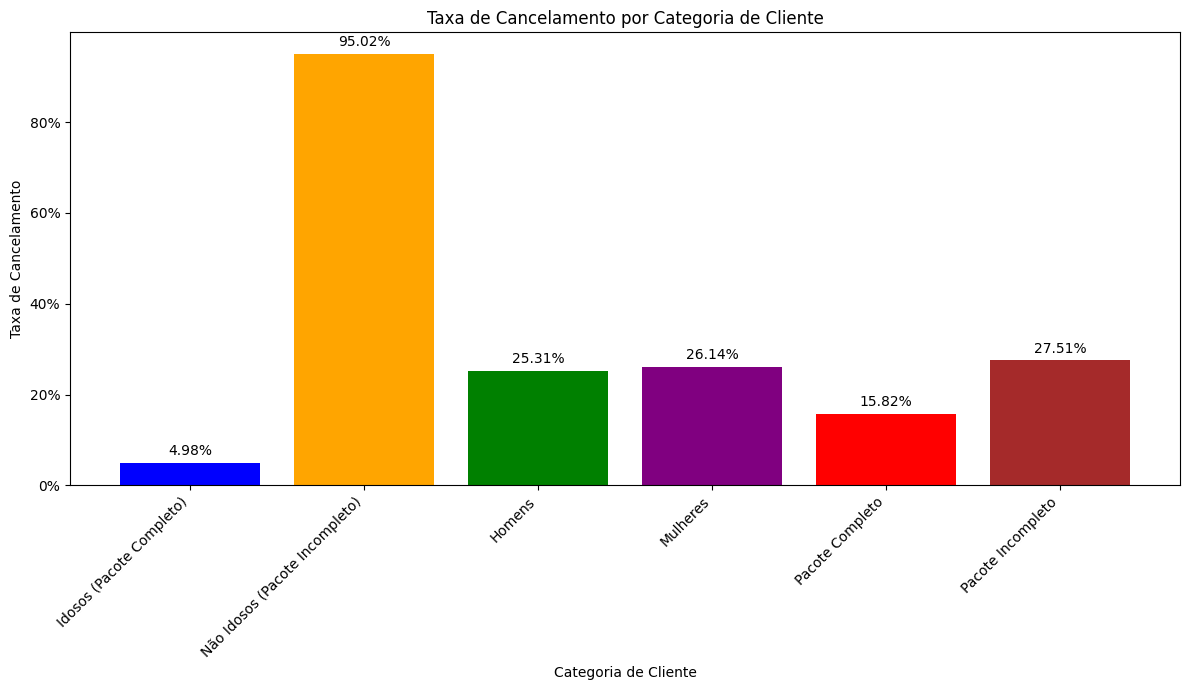

In [102]:
# Dados para o gráfico (usando o dicionário 'taxas' da célula anterior)
labels = list(taxas.keys())
values = list(taxas.values())

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'purple', 'red', 'brown'])

# Adicionando títulos e rótulos aos eixos
plt.title('Taxa de Cancelamento por Categoria de Cliente')
plt.xlabel('Categoria de Cliente')
plt.ylabel('Taxa de Cancelamento')

# Formatando os rótulos do eixo y como porcentagem
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando os valores acima das barras para melhor leitura (como porcentagem)
for i, value in enumerate(values):
    plt.text(i, value + 0.01, '{:.2%}'.format(value), ha='center', va='bottom')


# Ajustando o layout para evitar cortes nos rótulos
plt.tight_layout()

# Mostrando o gráfico
plt.show()

In [113]:

dados_clientes_não_ativos.Tipo_Contrato.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [112]:
dados_clientes_não_ativos.Metodo_Pagamento.unique()

array(['Electronic check', 'Mailed check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [129]:
# Filtrar o DataFrame para clientes que cancelaram
clientes_cancelaram = dados_df.query('Cancelou == "Yes"')

# Contar a frequência de cada método de pagamento entre os clientes que cancelaram
metodos_pagamento_cancelados = round(clientes_cancelaram['Metodo_Pagamento'].value_counts(normalize=True)*100,2)

tipos_de_contratos_cancelados = round(clientes_cancelaram['Tipo_Contrato'].value_counts(normalize=True)*100,2)

print("Frequência dos Métodos de Pagamento entre Clientes que Cancelaram:")
display(metodos_pagamento_cancelados)

print("Frequência dos tipos de contratos entre Clientes que Cancelaram:")
display(tipos_de_contratos_cancelados)


Frequência dos Métodos de Pagamento entre Clientes que Cancelaram:


,proportion
Metodo_Pagamento,
Electronic check,57.30
Mailed check,16.48
Bank transfer (automatic),13.80
Credit card (automatic),12.41


Frequência dos tipos de contratos entre Clientes que Cancelaram:


,proportion
Tipo_Contrato,
Month-to-month,88.55
One year,8.88
Two year,2.57


In [133]:
dados_numericos = dados_clientes_não_ativos[['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total', 'Cobranca_diaria_(valorMensal)', 'Cobranca_diaria_(valorTotal)']]

dados_numericos.head()



,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cobranca_diaria_(valorMensal),Cobranca_diaria_(valorTotal)
2,4,73.9,280.85,2.46,2.34
3,13,98.0,1237.85,3.27,3.17
4,3,83.9,267.40,2.80,2.97
18,45,62.7,2791.50,2.09,2.07
19,1,25.1,25.10,0.84,0.84


In [143]:
print(f"O minimo que o cliente permaneceu e cancelou foi de: {dados_numericos['Meses_Permanencia'].min()} mes")
print(f"O maximo que o Cliente permeneceu e cancelou foi de : {dados_numericos['Meses_Permanencia'].max()} meses")
print(f"tendo a média de permanencia de : {dados_numericos['Meses_Permanencia'].mean():.2f} meses")

O minimo que o cliente permaneceu e cancelou foi de: 1 mes
O maximo que o Cliente permeneceu e cancelou foi de : 72 meses
tendo a média de permanencia de : 17.98 meses


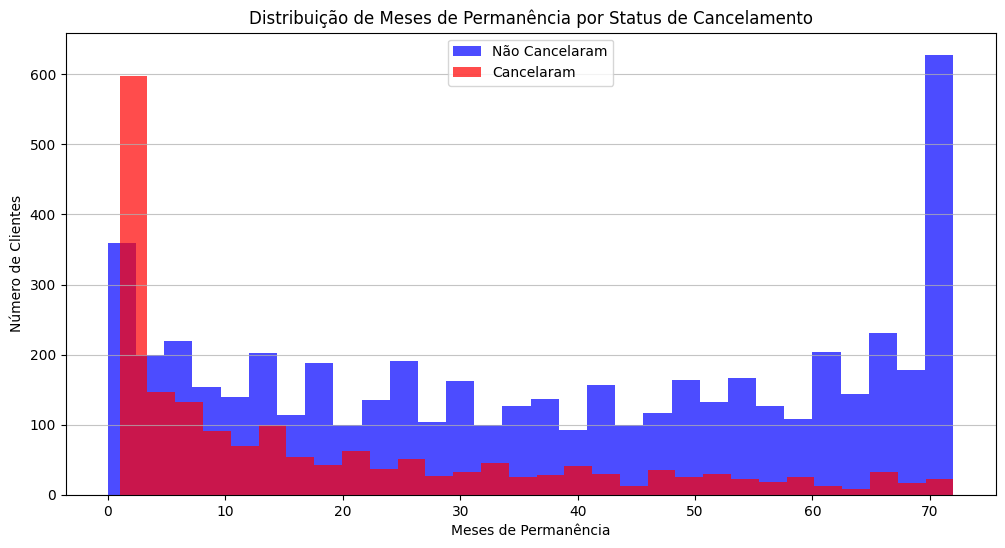

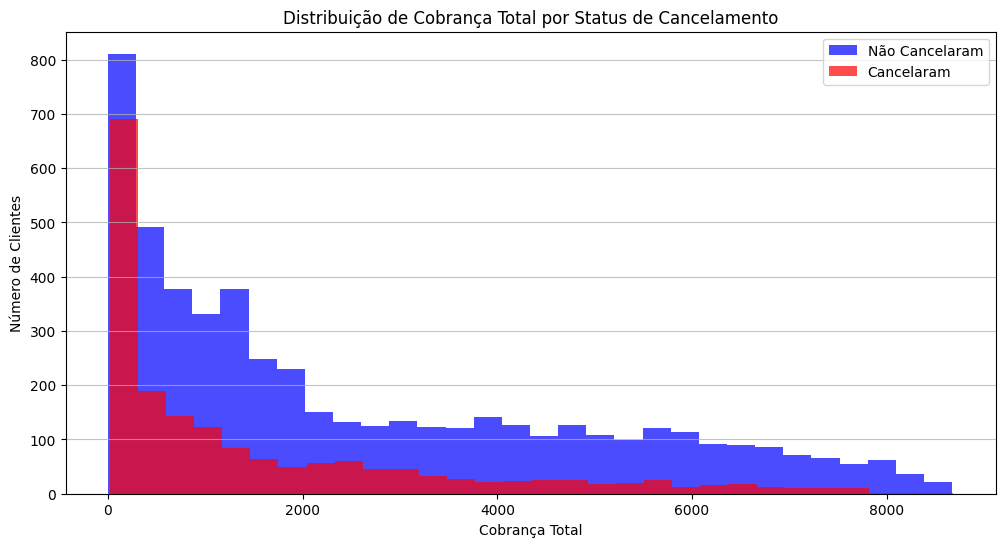

In [145]:
# Separar os dados com base no status de cancelamento
clientes_cancelaram = dados_df.query('Cancelou == "Yes"')
clientes_nao_cancelaram = dados_df.query('Cancelou == "No"')

# Visualizar a distribuição de 'Meses_Permanencia'
plt.figure(figsize=(12, 6))
plt.hist(clientes_nao_cancelaram['Meses_Permanencia'], bins=30, alpha=0.7, label='Não Cancelaram', color='blue')
plt.hist(clientes_cancelaram['Meses_Permanencia'], bins=30, alpha=0.7, label='Cancelaram', color='red')
plt.title('Distribuição de Meses de Permanência por Status de Cancelamento')
plt.xlabel('Meses de Permanência')
plt.ylabel('Número de Clientes')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Visualizar a distribuição de 'Cobranca_Total'
plt.figure(figsize=(12, 6))
plt.hist(clientes_nao_cancelaram['Cobranca_Total'], bins=30, alpha=0.7, label='Não Cancelaram', color='blue')
plt.hist(clientes_cancelaram['Cobranca_Total'], bins=30, alpha=0.7, label='Cancelaram', color='red')
plt.title('Distribuição de Cobrança Total por Status de Cancelamento')
plt.xlabel('Cobrança Total')
plt.ylabel('Número de Clientes')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# 📄 Relatório Final

## Introdução
O objetivo desta análise foi explorar os dados de clientes da TelecomX para identificar fatores que contribuem para a evasão de clientes (Churn). A redução do churn é essencial para a sustentabilidade da empresa, Conversão de variáveis numéricas (Meses_Permanencia, Cobranca_Mensal, Cobranca_Total).e compreender seus padrões permite desenhar estratégias de retenção mais eficazes.

## Limpeza e Tratamento de Dados
Dados carregados a partir de um arquivo JSON, integrando diferentes seções (cliente, telefone, internet, conta).
Padronização de nomes de colunas para maior clareza (ex.: customerID → ID_Cliente, Churn → Cancelou).
 Os dados foram carregados a partir de um arquivo JSON, combinando informações de diferentes seções (customer, phone, internet, account) em um único DataFrame. As colunas foram renomeadas para maior clareza (e.g., 'customerID' para 'ID_Cliente', 'Churn' para 'Cancelou'). Conversão de variáveis numéricas (Meses_Permanencia, Cobranca_Mensal, Cobranca_Total). Valores ausentes em Cobranca_Total preenchidos com 0.Remoção de 224 registros inválidos na coluna Cancelou (falsos nulos). Criação de colunas derivadas (e.g., Cobrança Diária) para análises adicionais.

## Análise Exploratória de Dados
Diversas análises exploratórias foram realizadas para identificar padrões de cancelamento:

*   **Análise de Idosos vs Não Idosos:** Comparamos o tempo de permanência e as cobranças entre clientes idosos e não idosos. Embora a média de meses de permanência seja similar, clientes idosos apresentam cobranças mensais e totais médias mais altas. A proporção de idosos nos dados é de 16.27%, e a proporção de idosos que permanecem é de 9.16%.

*   **Análise por Gênero:** Comparamos o número de clientes ativos e cancelados por gênero. As taxas de cancelamento entre homens (25.31%) e mulheres (26.14%) são bastante próximas.

*   **Análise de Clientes com Pacote Completo vs Incompleto:** Clientes com o "pacote completo" de serviços (Serviço de Telefone, Múltiplas Linhas, Suporte Técnico, Streaming TV e Streaming Filmes) representam uma pequena parcela dos clientes ativos (9.57%). A taxa de cancelamento para clientes com pacote completo (15.82%) é significativamente menor do que para clientes com pacote incompleto (27.51%).

*   **Análise dos Métodos de Pagamento:** Entre os clientes que cancelaram, o método de pagamento mais frequente é o **Electronic check** (57.30%), seguido por Mailed check (16.48%), Bank transfer (automatic) (13.80%) e Credit card (automatic) (12.41%).

*   **Análise da Distribuição de Variáveis Numéricas:**
    *   **Meses de Permanência:** A distribuição do tempo de permanência mostra que clientes que cancelam tendem a ter um tempo de permanência menor, com um pico claro nos primeiros meses. Clientes que não cancelam têm uma distribuição mais uniforme ao longo do tempo, com muitos clientes permanecendo por longos períodos. (Veja o Histograma de Meses de Permanência).
    *   **Cobrança Total:** A distribuição da cobrança total também difere. Clientes que cancelam frequentemente têm cobranças totais mais baixas, o que se alinha com um tempo de permanência menor. Clientes que não cancelam mostram uma distribuição mais ampla de cobranças totais, incluindo muitos clientes com valores acumulados altos devido a longos períodos de serviço. (Veja o Histograma de Cobrança Total).

*   **Grupo com Maior Taxa de Cancelamento:** A análise das taxas de cancelamento por categoria revelou que o grupo com a maior taxa de cancelamento ('Vazão') é **Não Idosos (Pacote Incompleto)** com 95.02%, embora esta taxa possa ser influenciada pela forma como os grupos foram definidos nesta comparação específica. A análise das taxas por tipo de pacote (Completo vs Incompleto) mostra que **clientes com Pacote Incompleto** têm uma taxa de cancelamento significativamente maior (27.51%) em comparação com clientes com Pacote Completo (15.82%). O gráfico de barras "Taxa de Cancelamento por Categoria de Cliente" ilustra essas comparações.

## Conclusões e Insights
Os dados sugerem que o tempo de permanência e o tipo de pacote de serviço são fortes indicadores de churn. Clientes com menor tempo de permanência e aqueles sem um pacote de serviços completo têm maior probabilidade de cancelar. O método de pagamento "Electronic check" também está altamente associado ao cancelamento. Gênero e status de idoso (isoladamente na comparação de pacote completo/incompleto) parecem ter menos impacto direto na taxa de cancelamento comparados ao tempo de permanência e tipo de pacote.

## Recomendações
Com base nesta análise, a TelecomX pode considerar as seguintes ações:
*   **Focar na retenção de novos clientes:** Implementar estratégias de engajamento intensivas nos primeiros meses de serviço.
*   **Promover pacotes de serviço completos:** Incentivar clientes com pacotes incompletos a adicionar mais serviços, destacando o valor e os benefícios de um pacote completo, o que pode aumentar a satisfação e reduzir o churn.
*   **Investigar o método de pagamento "Electronic check":** Analisar por que clientes que usam este método de pagamento têm uma taxa de cancelamento tão alta. Pode haver problemas com o processo de pagamento, taxas associadas ou um perfil de cliente específico que prefere este método e é mais propenso ao churn.
*   **Monitorar clientes com Pacotes Incompletos:** Identificar proativamente clientes com pacotes incompletos e desenvolver ofertas ou comunicações direcionadas para aumentar o valor percebido do serviço e incentivá-los a permanecer.